In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import seaborn as sns

In [66]:
root_dir = "/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/"
models = {'Rotation': '2023-11-29/', 'Translation': '2024-01-17/'}
embeddings = 'dHCP_embeddings'
labels=['Preterm_28', 'Preterm_32', 'Preterm_37']
target = 'train_val_values.json'
metric = 'train_val_auc'

In [67]:
dict_values = {label : {key: [] for key in models.keys()} for label in labels}

In [69]:
for key, model in models.items():
    models_dirs = os.path.join(root_dir,model)
    for label in labels:
        selected_models_dirs = [root for root, dirs, files in os.walk(models_dirs)
                                    if (target in files) & (label in root) & ('best_model' not in root)]
        print(f'{label}, {key}: {selected_models_dirs}')
        values = []
        for directory in selected_models_dirs:
            with open(os.path.join(directory,target), 'r') as f:
                perf = json.load(f)
                value = perf[metric][0]
                values.append(value)
        dict_values[label][key]=values
        

Preterm_28, Rotation: ['/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_2/dHCP_embeddings/Preterm_28', '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_1/dHCP_embeddings/Preterm_28', '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/09-59-38_188/dHCP_embeddings/Preterm_28', '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_0/dHCP_embeddings/Preterm_28']
Preterm_32, Rotation: ['/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_2/dHCP_embeddings/Preterm_32', '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_1/dHCP_embeddings/Preterm_32', '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/09-59-38_188/dHCP_embeddings/Preterm_32', '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_0/dHCP_embeddings/Preterm_32']
Preterm_37, Rotation: ['/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Outp

In [70]:
cols = ['Prematurity Class', 'Augmentation', 'AUC']
df = pd.DataFrame([[k1, k2, elem] for k1, v1 in dict_values.items() for k2, list_val in v1.items() for elem in list_val], columns=cols)

In [71]:
palette={'Rotation': 'darkred',
         'Translation': 'darkgreen'}

Text(0.5, 1.0, 'Translation vs Rotation')

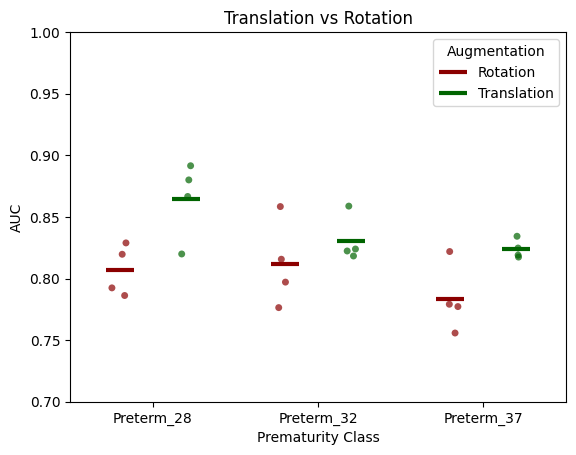

In [73]:
sns.stripplot(
data=df, x="Prematurity Class", y="AUC", hue="Augmentation",
dodge=True, alpha=.7, legend=False,
palette=palette
)
sns.pointplot(
    data=df, x="Prematurity Class", y="AUC", hue="Augmentation",
    dodge=.4, linestyle="none", errorbar=None,
    marker="_", markersize=20, markeredgewidth=3,
    palette=palette
)
#ax.set_title(side_name)
plt.ylim(0.7, 1)
plt.title('Translation vs Rotation')